**Подбор модели**

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Загружаем данные
df = pd.read_csv('data.csv')

In [31]:
# Предобработка данных (Сортировка, удаление лишних столбцов, не представляющих ценности для решения бизнес-задачи)
df = df[['Primary Keywords', 'Secondary Keywords', 'Long-Tail Keywords', 'Social Media Source', 'Media Type', 'Organic_Traffic', 'CTR (%)', 'Average_Position', 'Domain_Authority', 'Conversion_Rate (%)', 'Goal_Completions', 'Top_Landing_Pages', 'CPC_for_Paid_Keywords ($)', 'Mobile_vs_Desktop_Traffic_Split (%)', 'Organic_Revenue ($)']]
df.head()

,Primary Keywords,Secondary Keywords,Long-Tail Keywords,Social Media Source,Media Type,Organic_Traffic,CTR (%),Average_Position,Domain_Authority,Conversion_Rate (%),Goal_Completions,Top_Landing_Pages,CPC_for_Paid_Keywords ($),Mobile_vs_Desktop_Traffic_Split (%),Organic_Revenue ($)
0,eco-friendly accessories,athleisure for eco-conscious consumers,sustainable fashion for athletes,YouTube,Video,7965.0,3.14,46.44,45.0,6.80,246.0,Category Page,6.34,72.46,3597.90
1,recycled fabric dresses,eco-friendly sportswear,carbon-neutral activewear,Instagram,Infographic,6553.0,1.43,31.60,71.0,3.50,131.0,Homepage,7.94,89.91,5806.19
2,eco-friendly accessories,green fashion trends,biodegradable outdoor clothing,Instagram,Shorts,1982.0,3.45,36.20,42.0,12.36,98.0,Homepage,5.47,57.33,1170.33
3,eco-friendly accessories,sustainable activewear,carbon-neutral activewear,Instagram,Shorts,6363.0,0.96,30.98,58.0,3.98,454.0,Blog Post,2.25,66.45,1182.17
4,eco-friendly clothing,athleisure for eco-conscious consumers,carbon-neutral activewear,Instagram,Blog post,8720.0,8.30,9.93,14.0,7.88,128.0,Homepage,3.52,53.83,692.14


In [32]:
# Базовая статистика
df.describe()

,Organic_Traffic,CTR (%),Average_Position,Domain_Authority,Conversion_Rate (%),Goal_Completions,CPC_for_Paid_Keywords ($),Mobile_vs_Desktop_Traffic_Split (%),Organic_Revenue ($)
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5045.233994,5.312674,25.185706,49.671669,7.809134,256.846138,5.180741,70.028652,5038.863073
std,2837.551879,2.745068,14.211421,23.220733,4.189732,141.846836,2.743066,11.465030,2873.147070
min,100.000000,0.500000,1.000000,10.000000,0.500000,10.000000,0.500000,50.000000,101.470000
25%,2579.500000,2.947500,12.610000,30.000000,4.130000,133.000000,2.800000,60.087500,2536.270000
50%,5091.000000,5.350000,24.945000,50.000000,7.850000,259.500000,5.145000,70.130000,5094.800000
75%,7473.000000,7.720000,37.560000,70.000000,11.440000,380.000000,7.520000,79.820000,7487.325000
max,9999.000000,10.000000,50.000000,89.000000,15.000000,499.000000,10.000000,89.990000,9999.770000


In [33]:
# Проверка на пропущенные значения
df.isnull().sum()

,0
Primary Keywords,1
Secondary Keywords,1
Long-Tail Keywords,1
Social Media Source,1
Media Type,1
Organic_Traffic,1
CTR (%),1
Average_Position,1
Domain_Authority,1
Conversion_Rate (%),1


In [34]:
#Удаляем пропущенные значения
df = df.dropna()

#Изучение датасета для понимания наличия пропущенных значений
df.info()
# Вывод: теперь пропущенных значений нет, можно работать со всеми данными в таблице

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9995
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Primary Keywords                     9996 non-null   object 
 1   Secondary Keywords                   9996 non-null   object 
 2   Long-Tail Keywords                   9996 non-null   object 
 3   Social Media Source                  9996 non-null   object 
 4   Media Type                           9996 non-null   object 
 5   Organic_Traffic                      9996 non-null   float64
 6   CTR (%)                              9996 non-null   float64
 7   Average_Position                     9996 non-null   float64
 8   Domain_Authority                     9996 non-null   float64
 9   Conversion_Rate (%)                  9996 non-null   float64
 10  Goal_Completions                     9996 non-null   float64
 11  Top_Landing_Pages                  

In [38]:
# Предобработка данных (Кодирование категориальных переменных для последующей работы с ними и поиска корреляции)
label_encoders = {}
for col in ['Primary Keywords', 'Secondary Keywords', 'Long-Tail Keywords', 'Social Media Source', 'Media Type', 'Top_Landing_Pages']:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Столбец '{col}' уже числовой. Пропускаем кодировку")

In [39]:
# Проверим результаты кодировки, чтобы убедиться, что теперь можно работать с таблицей полностью
df.head()

,Primary Keywords,Secondary Keywords,Long-Tail Keywords,Social Media Source,Media Type,Organic_Traffic,CTR (%),Average_Position,Domain_Authority,Conversion_Rate (%),Goal_Completions,Top_Landing_Pages,CPC_for_Paid_Keywords ($),Mobile_vs_Desktop_Traffic_Split (%),Organic_Revenue ($)
0,0,0,4,6,5,7965.0,3.14,46.44,45.0,6.80,246.0,1,6.34,72.46,3597.90
1,3,2,2,1,2,6553.0,1.43,31.60,71.0,3.50,131.0,2,7.94,89.91,5806.19
2,0,4,1,1,4,1982.0,3.45,36.20,42.0,12.36,98.0,2,5.47,57.33,1170.33
3,0,5,2,1,4,6363.0,0.96,30.98,58.0,3.98,454.0,0,2.25,66.45,1182.17
4,1,0,2,1,0,8720.0,8.30,9.93,14.0,7.88,128.0,2,3.52,53.83,692.14


In [40]:
# Разделим данные на признаки и целевую переменную
X = df.drop('CPC_for_Paid_Keywords ($)', axis=1)
y = df['CPC_for_Paid_Keywords ($)']

# Делим данные на обучающую и отложенную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Выберем ключевые гиперпараметры для GradientBoostingRegressor:

- n_estimators: число деревьев. Чем оно больше, тем лучше модель может захватить сложные зависимости в данных, однако с целью исключить переобучение используем кол-во, не превышающее 200;
- learning_rate: скорость обучения. Держим *оптимальный* баланс между контролем влияния каждого регрессора на модель и скоростью обучения;
- max_depth: максимальная глубина дерева. Ищем баланс между достаточной мощностью дерева и риском переобучения;
- min_samples_split: минимальное число вариантов, чтобы произвести разделение. Гиперпараметр помогает контролировать рост дерева, а значит и риск переобучения модели;
- subsample: доля вариантов, используемая для обучения каждого дерева. Ищем оптимальное значение между обобщающей способностью модели и ее точностью.

In [15]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_


In [16]:
!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


In [19]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    subsample = trial.suggest_float('subsample', 0.8, 1.0)

    model = GradientBoostingRegressor(n_estimators=n_estimators,
                                       learning_rate=learning_rate,
                                       max_depth=max_depth,
                                       min_samples_split=min_samples_split,
                                       subsample=subsample)

    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    return score.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-10-22 09:49:15,346] A new study created in memory with name: no-name-7760fbca-2177-4741-8424-1ca414688d1c
[I 2024-10-22 09:50:05,002] Trial 0 finished with value: -8.49194560194309 and parameters: {'n_estimators': 155, 'learning_rate': 0.1979224384367257, 'max_depth': 6, 'min_samples_split': 9, 'subsample': 0.9973462681944784}. Best is trial 0 with value: -8.49194560194309.
[I 2024-10-22 09:50:19,941] Trial 1 finished with value: -7.857530987022409 and parameters: {'n_estimators': 130, 'learning_rate': 0.1260466826014559, 'max_depth': 4, 'min_samples_split': 2, 'subsample': 0.8469995406328523}. Best is trial 0 with value: -8.49194560194309.
[I 2024-10-22 09:50:47,906] Trial 2 finished with value: -8.229851251182748 and parameters: {'n_estimators': 130, 'learning_rate': 0.12961925670673102, 'max_depth': 7, 'min_samples_split': 2, 'subsample': 0.9892352194141738}. Best is trial 0 with value: -8.49194560194309.
[I 2024-10-22 09:51:16,679] Trial 3 finished with value: -7.7064333792

In [74]:
# Лучшие параметры
best_params = study.best_params
best_model = GradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.19789311349147556, max_depth=7,
                          n_estimators=152, subsample=0.8397319410381371)

In [75]:
# Оценка качества на отложенной выборке, используя метрику RMSE

y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE на отложенной выборке: {rmse}")

RMSE на отложенной выборке: 2.9629411461383923


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Интерпретация модели**

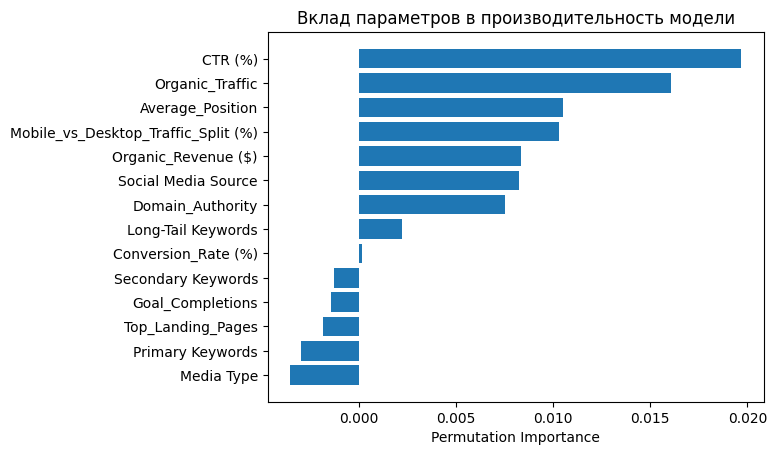

In [76]:
# Интерпретация модели с использованием Permutation Importance

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

results = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = results.importances_mean.argsort()

plt.barh(range(len(sorted_idx)), results.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Вклад параметров в производительность модели')
plt.show()

Экспертное мнение:
1. Наибольший вклад в производительность модели вносит большинство параметров, среди которых лидирует CTR. Данная тенденция может свидетельствовать о том, что большая часть параметров неразрывно связана с тем, что они влияют на эффективность рекламной кампании прямым образом. Важно отслеживать данные изменения и делать на них упор.
2. В свою очередь наименее важным параметром является Media Type с небольшим отрывом от других параметров. Объясняться это может тем, что на эффективность рекламной кампании мало влияет непосредственно тип источника, в котором транслируется реклама, т.к. воронка и конверсия в них примерно одинакова. Однако для более точного и однозначного ответа касаемо причин рекомендуется провести дальнейшие исследования.

In [56]:
# Интерпретация модели с использованием SHAP

import shap

X_test = X_test.astype(X_train.dtypes)
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

100%|===================| 1998/2000 [00:24<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 4.176551, while the model output was 5.271221. If this difference is acceptable you can set check_additivity=False to disable this check.

Экспертное мнение:

Данная ошибка возникает, вероятно, в следствие несоответствия типов данных между X_test и X_train. Это может произойти, если выполнить преобразования данных в X_train перед обучением модели, но не применить те же преобразования к X_test. Однако, на данный момент у меня возникают трудности с объединением тренировочной и тестовой модели, чтобы избежать ошибки, причем судя по результатам, 1998/2000 обрабатывается без проблем.